# Kyber

## Description

<p>CRYSTALS-Kyber is an asymmetric post-quantum algorithm that uses for general encryption, it's bases on Lattice problem. Replacement of RSA.
Lattice problem assumed to be harder than integer factorization.</p>

## Math model

<p>
A - Matrix.<br>
s - Secret vector.<br>
e - Error vector.<br>
t - Calculated vector.<br>
r - Public key of second person.<br>
(A,t) - Public key of first person.<br>
(e1, e2) - Generated small vector error.<br>
(0,m) - Message.<br>
(u,v) - Cipher text.<br>
</p>
<p>A and t are public key and s is private.</p>

### Key generation

<p>Kyber uses LWE(learning with errors): A*s + e = t</p>

### Encryption

<p>Kyber generation starting here: r*(A,t)=res</p>
<p>Adding errors and message: res + (e1,e2) + (0,m) = uv</p>

### Decryption

<p>Multiply u and s to get number close to v - m: us ≈ v-m</p>
<p>If we encode m with small trick, we can get message m just by subtracting.</p>

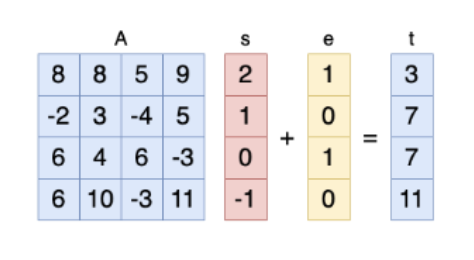

In [3]:
from IPython.display import Image
Image(filename="./Images/kyber/key_gen.png", width=300, height=200)

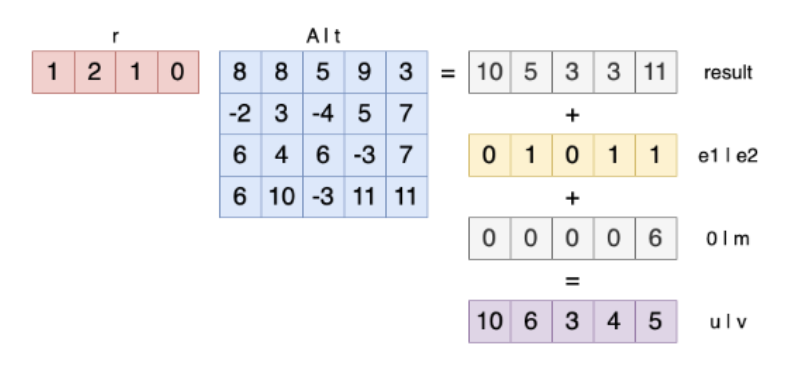

In [4]:
Image(filename="./Images/kyber/encryption.png", width=300, height=200)

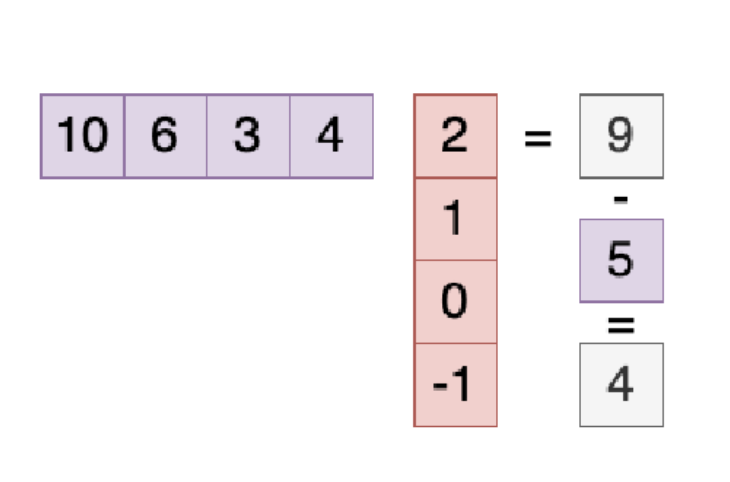

In [5]:
Image(filename="./Images/kyber/decryption.png", width=300, height=200)

In [23]:
# Implementation of Kyber Algorithm (Simplified)

import numpy as np

# Parameters
n = 3  # Dimension of the matrix
q = 3329  # A prime number

# Generate random matrix A
A = np.random.randint(0, q, size=(n, n))

# Generate secret vector s and error vector e
s = np.random.randint(0, q, size=(n, 1))
e = np.random.randint(0, q, size=(n, 1))

# Calculate t = A * s + e
t = (np.dot(A, s) + e) % q

print("Matrix A:\n", A)
print("Secret vector s:\n", s)
print("Error vector e:\n", e)
print("Calculated vector t:\n", t)

# Encryption function
def encryption(A, t, m):
    # Ensure m is mod q
    m = m % q

    # Generate random vector r and error vectors e1, e2
    r = np.random.randint(0, q, size=(n, 1))
    e1 = np.random.randint(0, q, size=(n, 1))
    e2 = np.random.randint(0, q, size=(1, 1))  # Fix shape issue

    # Calculate u = A * r + e1
    u = (np.dot(A, r) + e1) % q

    # Calculate v = t.T * r + e2 + m
    v = (np.dot(t.T, r) + e2 + m) % q

    return u, v

# Decryption function
def decryption(u, v, s):
    # Calculate m' = v - u.T * s
    m_prime = (v - np.dot(u.T, s)) % q
    return m_prime

# Example message
m = np.array([[123]])

# Encrypt the message
u, v = encryption(A, t, m)
print("Ciphertext u:\n", u)
print("Ciphertext v:\n", v)

# Decrypt the message
m_prime = decryption(u, v, s)
print("Decrypted message m':\n", m_prime)


Matrix A:
 [[2444 1229  168]
 [ 730 2261  595]
 [2900 2407 1202]]
Secret vector s:
 [[2236]
 [1483]
 [ 939]]
Error vector e:
 [[ 331]
 [ 648]
 [2695]]
Calculated vector t:
 [[1830]
 [1911]
 [3243]]
Ciphertext u:
 [[3210]
 [3264]
 [ 595]]
Ciphertext v:
 [[2475]]
Decrypted message m':
 [[2660]]
